<a href="https://colab.research.google.com/github/gangulyarin/Influencial_People_Kaggle/blob/main/Influencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c predict-who-is-more-influential-in-a-social-network

  0% 0.00/576k [00:00<?, ?B/s]
100% 576k/576k [00:00<00:00, 85.1MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('predict-who-is-more-influential-in-a-social-network.zip') as zf:
  zf.extractall('')

In [8]:
import pandas as pd

data = pd.read_csv('train.csv')
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [9]:
data.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

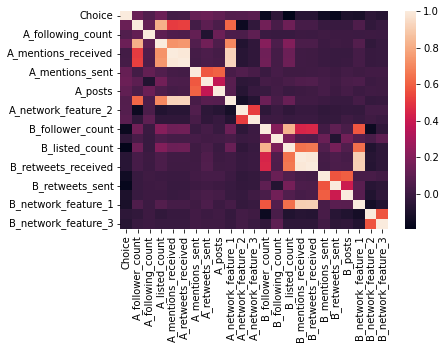

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = data.corr()
sns.heatmap(corr_mat)
plt.show()

In [14]:
from scipy.stats import pearsonr

corr,_ = pearsonr(data['A_retweets_received'],data['A_mentions_received'])
corr

0.9900206714970009

In [15]:
corr,_ = pearsonr(data['B_retweets_received'],data['B_mentions_received'])
corr

0.9864095511768503

In [18]:
corr,_ = pearsonr(data['B_retweets_sent'],data['B_mentions_received'])
corr

0.04868277736758093

In [21]:
train_data.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent', 'A_posts',
       'A_network_feature_1', 'A_network_feature_2', 'A_network_feature_3',
       'B_follower_count', 'B_following_count', 'B_listed_count',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [19]:
# Lets remove any one of these and try again
train_data = data.drop(columns = ['A_mentions_received','B_mentions_received'])

In [22]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_data.drop(columns=['Choice']),train_data['Choice'])

Pipeline :  Random Forest Classifier


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

Estimator with highest score:  RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=30)
Parameter  setting that gave best result on hold out data:  {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 30}
Score of beest_estimator on left out data:  0.7784242424242424
[[0.48368292 0.51631708]
 [0.96908314 0.03091686]
 [0.41498046 0.58501954]
 ...
 [0.42701348 0.57298652]
 [0.05831574 0.94168426]
 [0.81598567 0.18401433]]
Accuracy Score:  0.7898181818181819


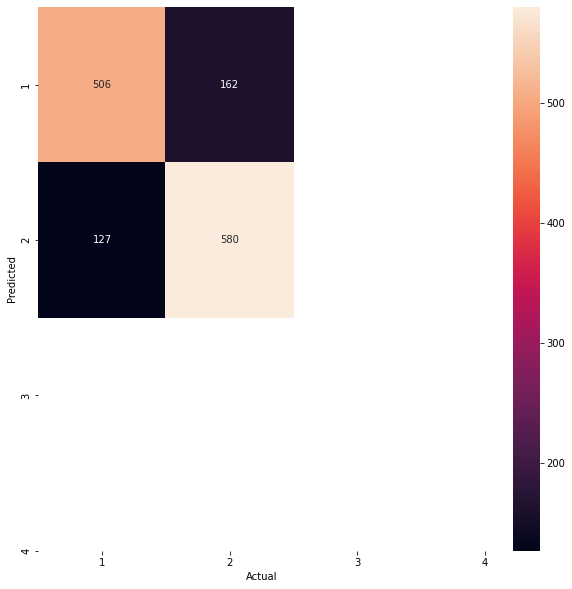

Pipeline :  Logistic Regression


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

Estimator with highest score:  LogisticRegression(C=100)
Parameter  setting that gave best result on hold out data:  {'C': 100, 'penalty': 'l2'}
Score of beest_estimator on left out data:  0.7333333333333333
[[0.80154865 0.19845135]
 [0.63450178 0.36549822]
 [0.41198317 0.58801683]
 ...
 [0.50427097 0.49572903]
 [0.4522516  0.5477484 ]
 [0.64239557 0.35760443]]
Accuracy Score:  0.7454545454545455


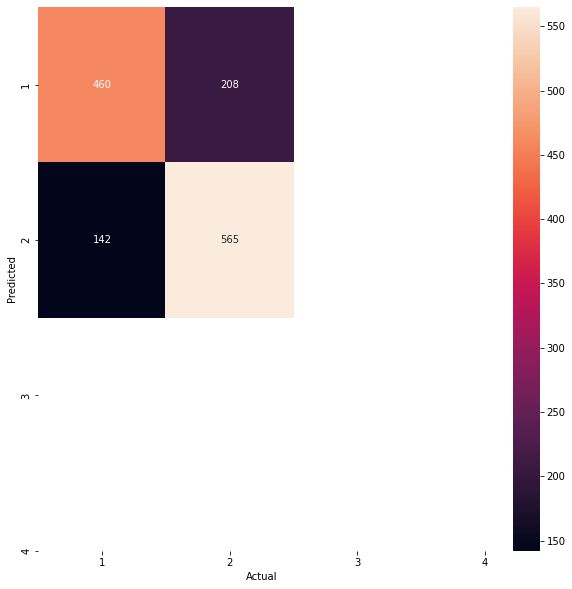

Pipeline :  Decision Tree


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

 

Estimator with highest score:  DecisionTreeClassifier(max_depth=6, max_features='sqrt')
Parameter  setting that gave best result on hold out data:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}
Score of beest_estimator on left out data:  0.7473939393939394
[[0.64673913 0.35326087]
 [0.89583333 0.10416667]
 [0.42125984 0.57874016]
 ...
 [0.45238095 0.54761905]
 [0.15315315 0.84684685]
 [0.8556701  0.1443299 ]]
Accuracy Score:  0.757090909090909


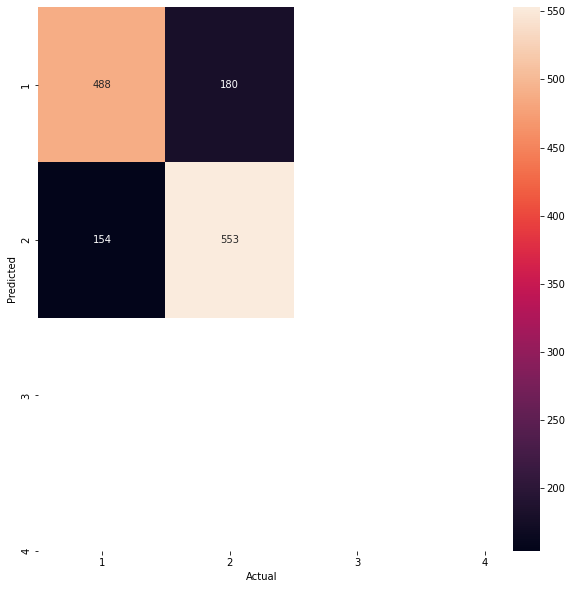

Pipeline :  Gradint Boosting


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/

Estimator with highest score:  GradientBoostingClassifier(learning_rate=0.01, max_depth=6, max_features='log2',
                           n_estimators=20)
Parameter  setting that gave best result on hold out data:  {'learning_rate': 0.01, 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 20}
Score of beest_estimator on left out data:  0.7677575757575757
[[0.50385783 0.49614217]
 [0.57072761 0.42927239]
 [0.48010157 0.51989843]
 ...
 [0.46868687 0.53131313]
 [0.43005251 0.56994749]
 [0.53940018 0.46059982]]
Accuracy Score:  0.7818181818181819


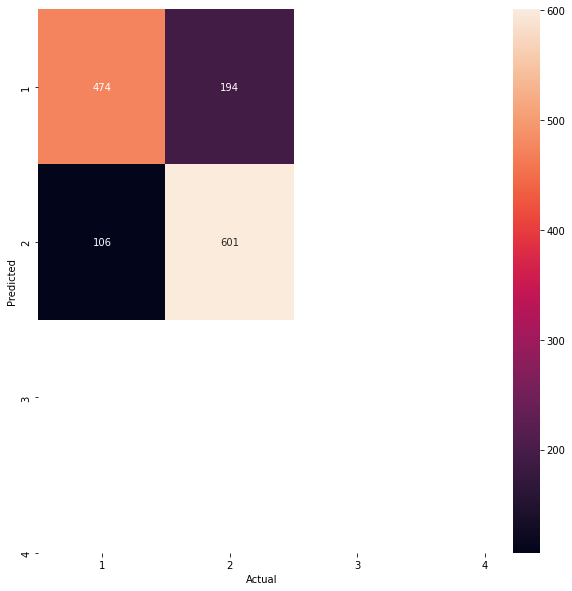

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

rfc = RandomForestClassifier()
gb = GradientBoostingClassifier()
dc = DecisionTreeClassifier()
lg = LogisticRegression()

models = [rfc,lg,dc,gb]

n_features = len(train_data.columns)

param_rfc ={
    'n_estimators':[10,20,30,40],
    'max_features': ['sqrt','log2',n_features],
    'max_depth': [3,6,9,12,15]
}

param_lg = {
    'penalty':['l1','l2'],
    'C':[0.0001,0.001,0.01,1,10,100]
}

param_tree = {
    'criterion':['gini','entropy'],
    'max_features': ['sqrt','log2',n_features],
    'max_depth': [3,6,9,12,15]
}

param_gb = {
    'max_features': ['sqrt','log2',n_features],
    'max_depth': [3,6,9,12,15],
    'learning_rate':[0.001,0.01,1],
    'n_estimators':[10,20,30]
}

params = [param_rfc,param_lg,param_tree,param_gb]

grid_dict = ['Random Forest Classifier','Logistic Regression','Decision Tree','Gradint Boosting']

for idx,model in enumerate(models):
  gs = GridSearchCV(model,params[idx],scoring='accuracy',cv=5,n_jobs=-1)
  print("Pipeline : ",grid_dict[idx])
  gs_fit =gs.fit(train_X, train_y)
  print("Estimator with highest score: ",gs_fit.best_estimator_)
  print("Parameter  setting that gave best result on hold out data: ",gs_fit.best_params_)
  print("Score of beest_estimator on left out data: ", gs_fit.best_score_)
  preds = gs_fit.predict(test_X)
  pred_proba = gs_fit.predict_proba(test_X)
  print(pred_proba)
  print("Accuracy Score: ",accuracy_score(test_y,preds))

  conf_mat = confusion_matrix(test_y,preds)
  fig,ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=[1,2,3,4],yticklabels=[1,2,3,4])
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.show()